<h1>Stock Analysis</h1>
Here, we have stock data from four tech companies.
<ul>
    <li>Time: The date and time of the day</li>
    <li>Open: The price of the stock at the start of the day when the market opens</li>
    <li>High: The highest price of the stock on that day</li>
    <li>Low: The lowest price of the stock on that day</li>
    <li>Close: The price of the stock at the end of the day when the market closes</li>
    <li>Volume: The number of stocks traded that day</li>
</ul>

In [1]:
import pandas as pd

sys = pd.read_csv('SYS.csv') 
sys.head(5)

,Time,Open,High,Low,Close,Volume
0,"Jan 1, 2018",75.50,75.5,75.00,75.00,4000
1,"Jan 2, 2018",74.85,76.0,73.11,75.32,197500
2,"Jan 3, 2018",74.03,74.6,72.30,72.75,21000
3,"Jan 4, 2018",71.03,74.5,71.03,74.01,381500
4,"Jan 5, 2018",74.35,77.0,71.00,76.52,180500


In [2]:
sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    243 non-null    object 
 1   Open    243 non-null    float64
 2   High    243 non-null    float64
 3   Low     243 non-null    float64
 4   Close   243 non-null    float64
 5   Volume  243 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.5+ KB


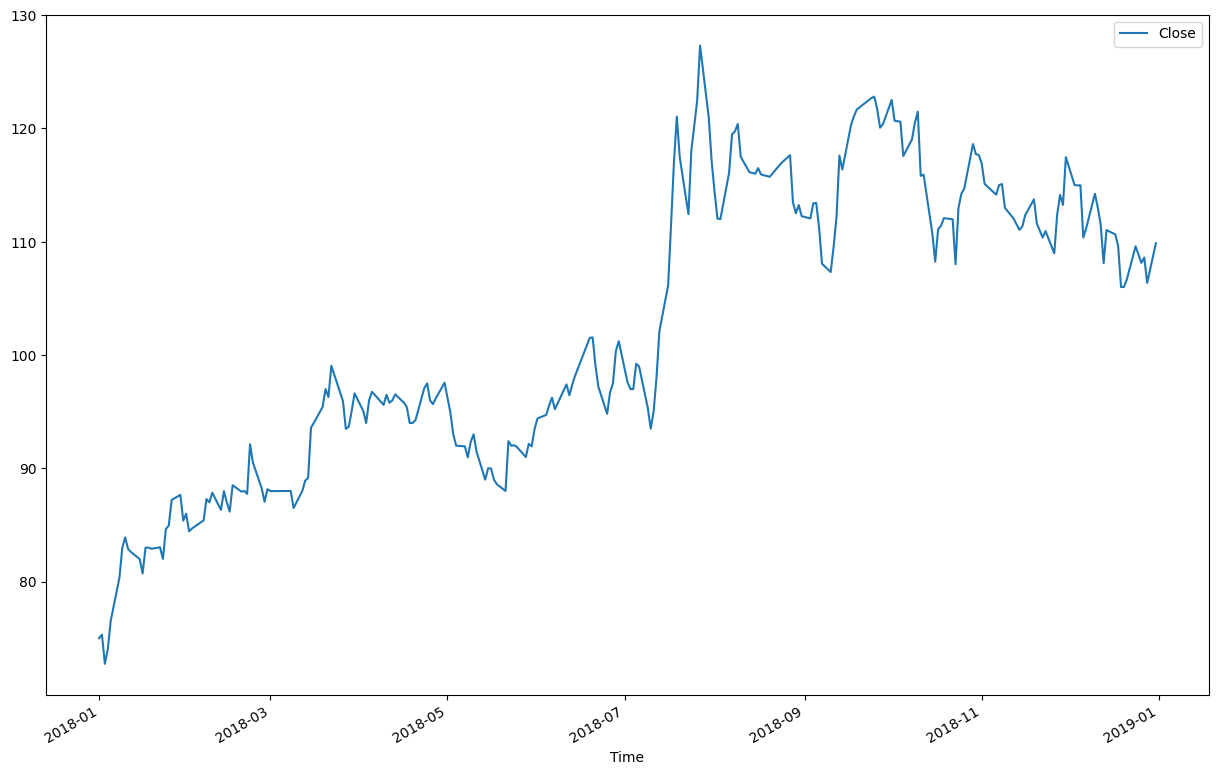

In [3]:
import matplotlib.pyplot as plt

sys['Time'] = pd.to_datetime(sys['Time']) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index
sys['Close'].plot(legend = True, figsize=(15,10))
plt.show()

In [4]:
days = 50 # Moving average window
col_name = "mv_avg for " + str(days) + " days" # New column to store moving average vlues
sys[col_name] = sys['Close'].rolling(days).mean() #Calculating moving average

<Axes: xlabel='Time'>

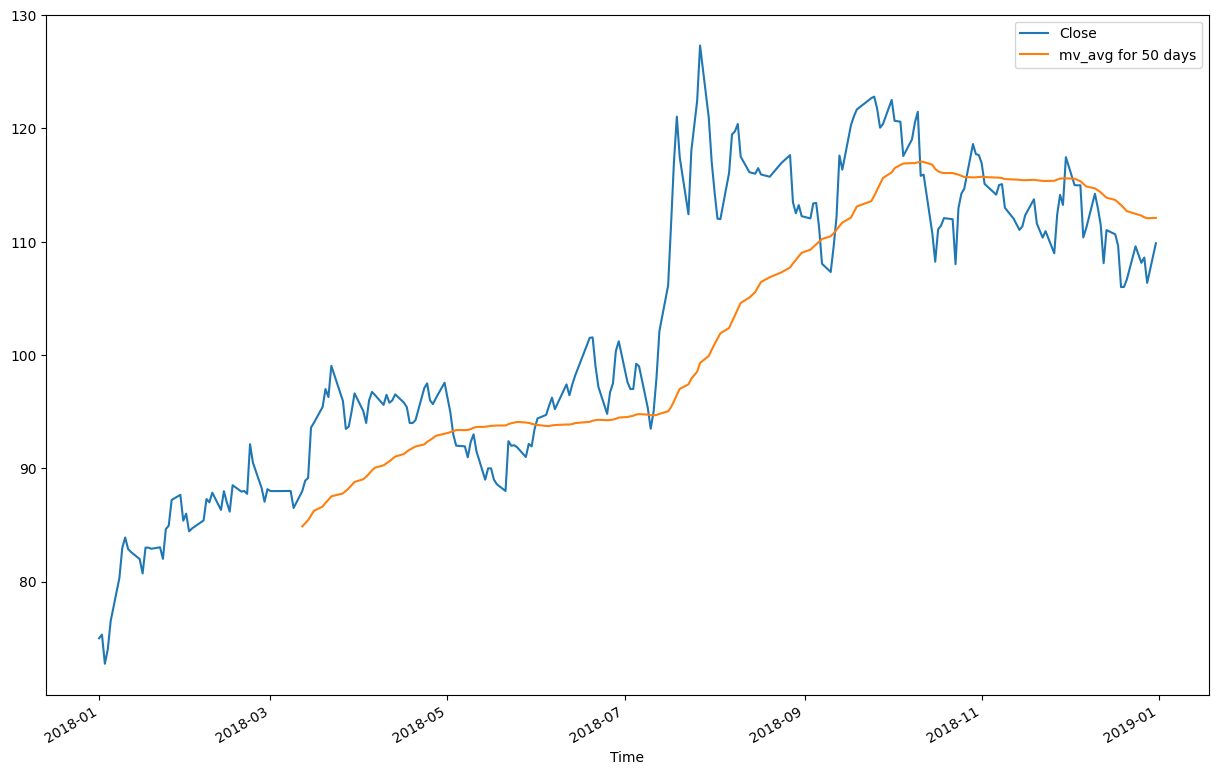

In [5]:
sys[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10)) # Plotting the closing price with moving avarage for comprison

<Axes: xlabel='Time'>

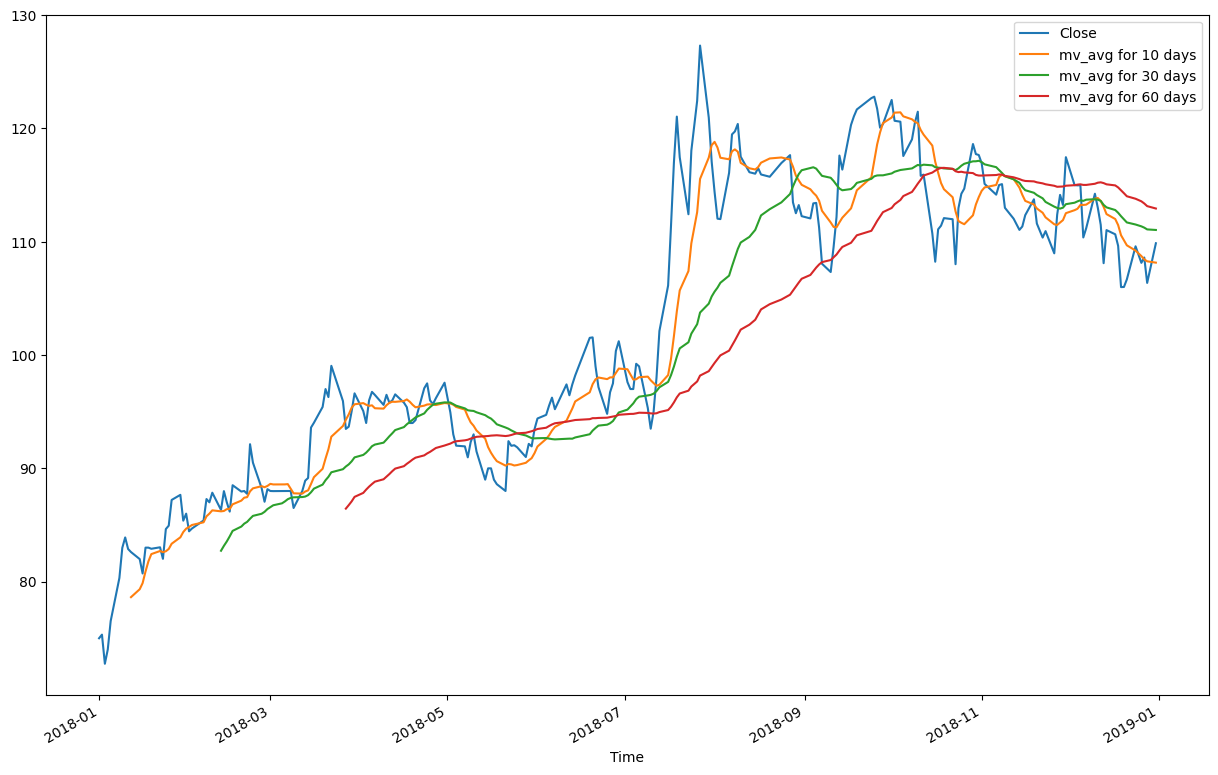

In [6]:
days = [10, 30 , 60] # Multiple number of days
for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    sys[col_name] = sys['Close'].rolling(day).mean()
    
sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize=(15,10))


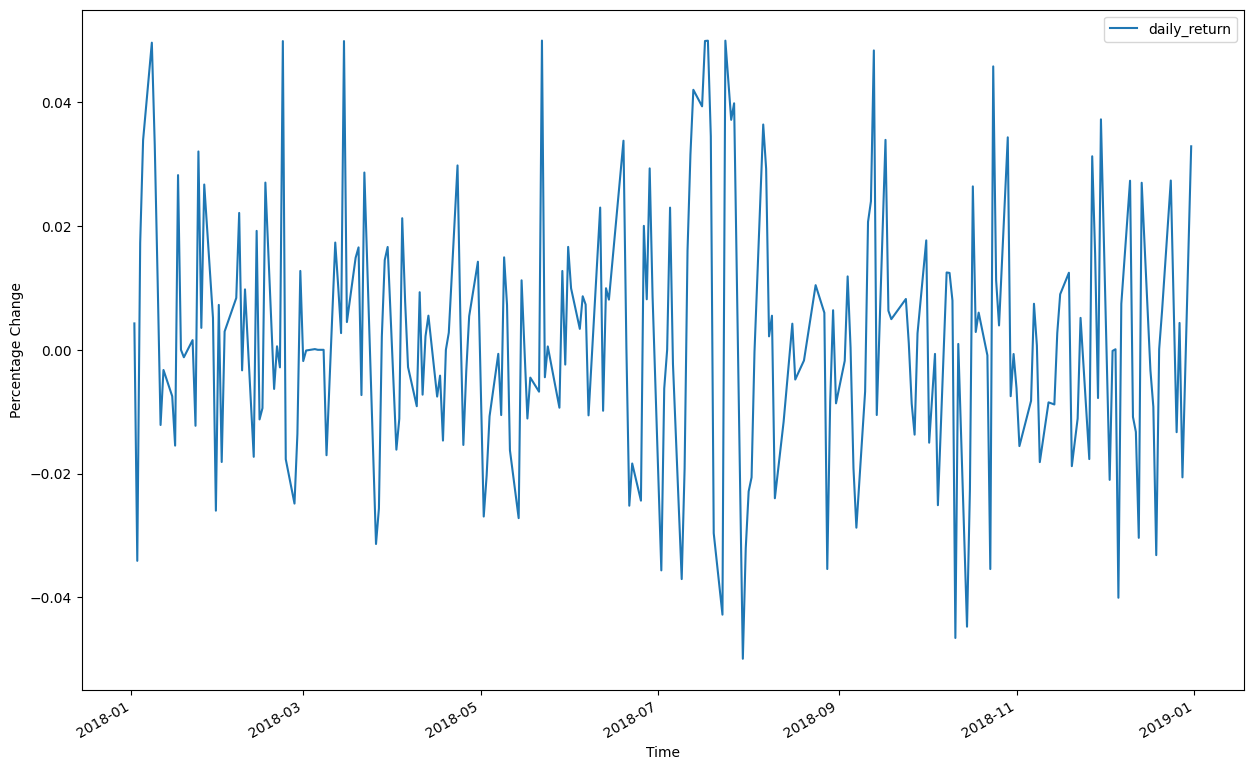

In [29]:
daily_return = sys['Close'].pct_change() # Calculate the daily returns
sys['daily_return'] = daily_return # Create new column and assign daily return values to it

sys['daily_return'].plot(legend = True, figsize=(15,10)) # plot the daily return values
plt.ylabel('Percentage Change') # Assign a name to the y-axis of plot
plt.show()

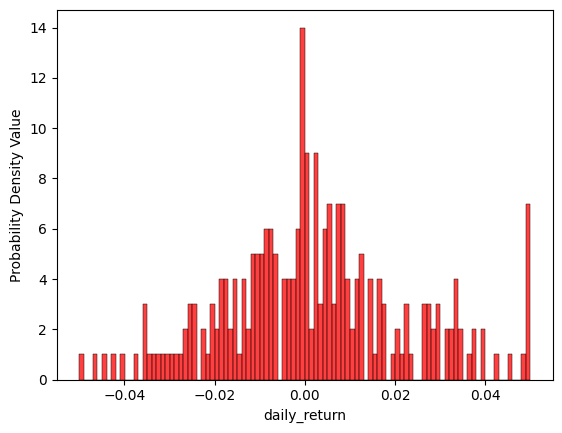

In [33]:
import seaborn as sns

sns.histplot(sys['daily_return'].dropna(), bins = 100, color = 'red') # plots a distribution graph of KDE and histogram 
plt.ylabel('Probability Density Value') # Assign a name to the y-axis of plot
plt.show()

In [10]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv')
ns = pd.read_csv('NETSOL.csv')
ptc = pd.read_csv('PTCL.csv')
avn = pd.read_csv('AVN.csv') 

sys['Time'] = pd.to_datetime(sys['Time'])
ns['Time'] = pd.to_datetime(ns['Time'])
ptc['Time'] = pd.to_datetime(ptc['Time'])
avn['Time'] = pd.to_datetime(avn['Time'])

sys = sys.set_index('Time')
ns = ns.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')

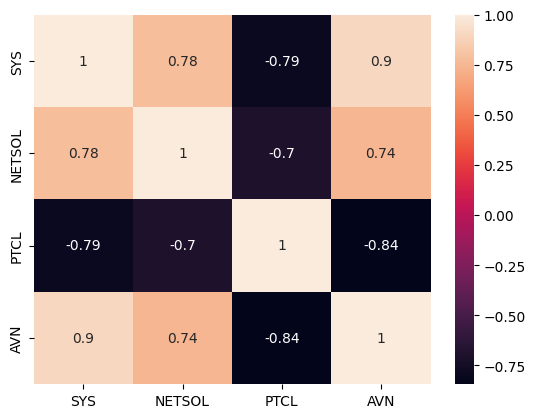

In [12]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTCL': ptc['Close'], 
                   'AVN': avn['Close']})

corr = (df.dropna()).corr()

sns.heatmap(corr, annot = True) # Plotting heatmap
plt.show()

In [14]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

all_returns = df.pct_change()
print(all_returns)

                 SYS    NETSOL       PTC       AVN
Time                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02  0.004267  0.015533 -0.009745 -0.003127
2018-01-03 -0.034121 -0.021107 -0.006813  0.006273
2018-01-04  0.017320  0.029688  0.047256  0.006517
2018-01-05  0.033914  0.024886 -0.017467  0.047016
...              ...       ...       ...       ...
2018-12-24  0.027372 -0.000499 -0.006148  0.015297
2018-12-26 -0.013321  0.007863  0.006186  0.036624
2018-12-27  0.004346 -0.048793 -0.003074  0.006853
2018-12-28 -0.020624 -0.049993 -0.009250 -0.006220
2018-12-31  0.032904 -0.048513 -0.003112 -0.023618

[247 rows x 4 columns]


<Axes: >

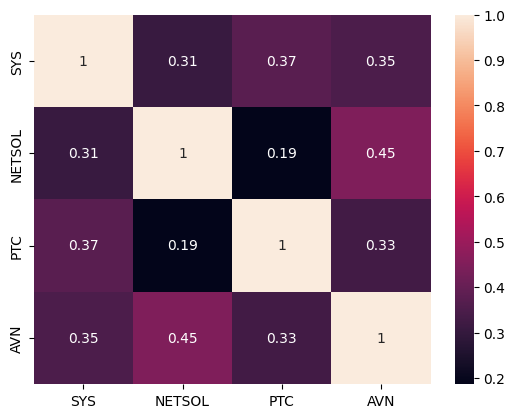

In [15]:
corr = (all_returns.dropna()).corr()
sns.heatmap(corr, annot = True)

In [16]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
print("Averge daily return of companies\n", avg_daily_return)

daily_risk = ret.std() # Take standard deviation of the daily return of all companies
print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Averge daily return of companies
 SYS       0.001755
NETSOL    0.000897
PTC      -0.001173
AVN       0.003843
dtype: float64

Daily Risk or standard deviation of companies
 SYS       0.020158
NETSOL    0.034407
PTC       0.017892
AVN       0.027037
dtype: float64


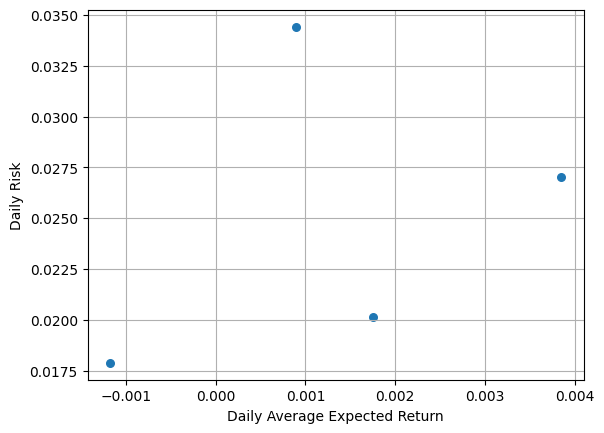

In [17]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
daily_risk = ret.std() # Take standard deviation of the daily return of all companies

plt.xlabel("Daily Average Expected Return") # Name the x-axis
plt.ylabel("Daily Risk") # Name the y-axis

plt.grid() # Add grid lines on the plot

plt.scatter(avg_daily_return, daily_risk, s = 30) # Plot the scatter plot for risk & return

In [18]:
ret = all_returns.dropna()

avg_daily_return = ret.mean()
daily_risk = ret.std()

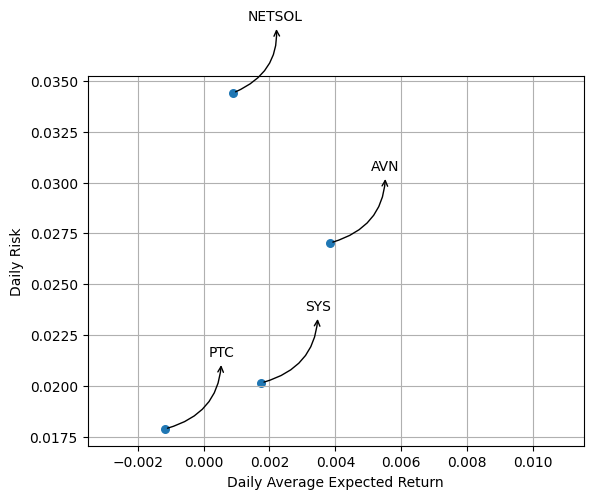

In [20]:
plt.xlabel("Daily Average Expected Return")
plt.ylabel("Daily Risk")

plt.xlim(ret.mean().min() + ret.mean().min()*2, ret.mean().max() + ret.mean().max()*2)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid()

plt.scatter(avg_daily_return, daily_risk, s = 30)
plt.show()


In [22]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

all_returns = df.pct_change()

investment = 100000

loss = (abs(all_returns.quantile(0.1))) * investment
loss

SYS       2344.682683
NETSOL    4948.152026
PTC       1909.463216
AVN       3163.165179
Name: 0.1, dtype: float64

In [23]:
daily_returns = sys['Close'].pct_change() # Calculating daily returns

# Calculating log returns from daily returns
log_returns = np.log(1 + daily_returns)

avg = log_returns.mean() # Calculating average of log returns
var = log_returns.var() # Calculating variance

drift = avg - (var / 2.0) # Calculating drift

drift = np.array(drift) # Convert to array

print("The calculated Drift is:", drift)

The calculated Drift is: 0.0013727067354237406


In [25]:
from scipy.stats import norm

pred_price_overDays = 60 # Number of days
pred_count = 10 # Range of prediction

std = log_returns.std() # Calculating STD
std = np.array(std) # Convert to array

x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array

Rv = std * norm.ppf(x) # Calculating Rv

print("The required Rv array is:\n", Rv)

The required Rv array is:
 [[ 9.68629263e-03  1.91221336e-02 -2.06223923e-02 -4.26075364e-03
   3.10949127e-03  2.41169618e-02 -2.43395160e-02  2.16178268e-02
   3.34834740e-02  2.82450472e-02]
 [-3.33676779e-02 -8.42277860e-03  1.41845637e-02  1.47275086e-02
   7.82130330e-03  4.47528851e-03  1.74014054e-03 -1.61403526e-02
   7.81738979e-03 -5.02773197e-03]
 [ 2.56439526e-02 -1.74774760e-02 -2.68014637e-02 -3.18696138e-02
  -1.81879353e-03 -9.75889945e-03  2.61789754e-02  3.26506029e-02
  -6.75447034e-03  9.59138310e-04]
 [-1.73563985e-02  5.81907743e-03  1.10459539e-03  1.31877387e-03
  -1.45188044e-02  2.90239091e-02 -1.86570092e-02 -1.18573203e-02
   2.57799368e-02 -1.31398531e-02]
 [-5.19030067e-02  1.90077955e-02 -3.17481737e-02  3.59134955e-02
   2.34375853e-02 -2.99837370e-02  1.62821676e-03 -3.45765904e-03
  -3.28602586e-02 -2.56631935e-02]
 [-2.17382318e-02  2.79522332e-02 -1.01872462e-02 -1.20987228e-02
  -2.28638979e-02 -3.94083775e-02 -6.84922809e-03 -2.07132227e-02
   3.2

In [26]:
e_value = np.exp(drift + Rv) # Calculating the E value
current_price = sys['Close'].iloc[-1] # Selecting last price of the year
new_prices = np.zeros_like(e_value) # create array to store the results
new_prices[0] = current_price

new_prices

array([[109.87, 109.87, 109.87, 109.87, 109.87, 109.87, 109.87, 109.87,
        109.87, 109.87],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  

The Minimum Predicted Price: 96.14866755671615
The Maximum Predicted Price: 128.87450667127555


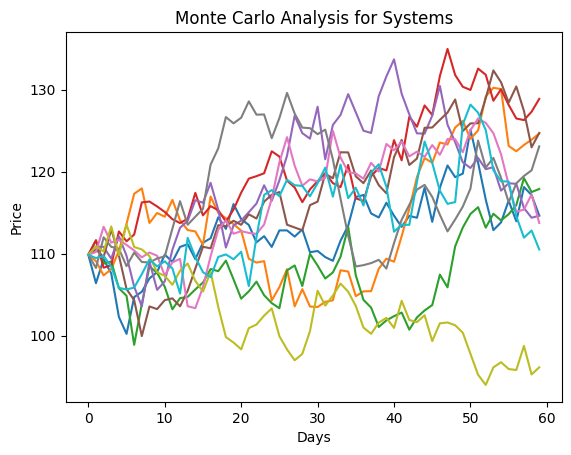

In [27]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price

plt.xlabel('Days') # Assign name to x-axis
plt.ylabel('Price') # Assign name to y-axis
plt.title('Monte Carlo Analysis for Systems') # Assign name to the plot
plt.plot(new_prices)# plot the figure
plt.show()